In [1]:
import numpy as np
import matplotlib.pyplot as plt

We have a rod of a given length in meters. The boundary condition is that: \
$T(0,t)$ = Temperature at $x=0$ part of the rod \
$T(x_{o},t)$ = Temperature at the end point of the rod \
$T(x,0)$ = Temperature at all the points at $ t=0 $ 

In [2]:
l = int(input("Enter the length of the rod in meters: "))
dl = l/50
# T_o = float(input("Enter the temperature at the x = 0 m  for all time in Kelvin: "))
# T_l = float(input("Enter the temperature at the endpoint in kelvin: "))
t_net = int(input("Enter the total time for simulation: "))
dt = (dl**2)*(0.4)
T_o = 273
T_l = 567

Enter the length of the rod in meters:  1
Enter the total time for simulation:  10


In [14]:
x = np.arange(0 , l+dl , dl)
t = np.arange(0 , t_net + dt , dt)

In [15]:
lamda = dt/(dl)**2
T = np.zeros((len(x) , len(t)))
len(x)

51

In [16]:
# setting the BC at t=0
initial_condition = (273 + (567 - 273) * x /x[-1] + 900 * np.sin(np.pi * x / x[-1]))
initial_condition

array([ 273.        ,  335.39146758,  397.55991021,  459.28318313,
        520.34089845,  580.51529494,  639.59209742,  697.36136241,
        753.61830669,  808.16411548,  860.80672706,  911.36159077,
        959.65239534, 1005.51176468, 1048.7819185 , 1089.31529494,
       1126.97513295, 1161.63601204, 1193.18434722, 1221.5188373 ,
       1246.55086467, 1268.20484502, 1286.41852566, 1301.14323118,
       1312.34405559, 1320.        , 1324.10405559, 1324.66323118,
       1321.69852566, 1315.24484502, 1305.35086467, 1292.0788373 ,
       1275.50434722, 1255.71601204, 1232.81513295, 1206.91529494,
       1178.1419185 , 1146.63176468, 1112.53239534, 1076.00159077,
       1037.20672706,  996.32411548,  953.53830669,  909.04136241,
        863.03209742,  815.71529494,  767.30089845,  718.00318313,
        668.03991021,  617.63146758,  567.        ])

In [17]:
T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
T[:, 0 ] = initial_condition
T[0 ,: ] = T_o
T[-1,: ] = T_l 

In [19]:
T # x -> poistion along the rod     # y  --> time 

array([[273.        , 273.        , 273.        , ..., 273.        ,
        273.        , 273.        ],
       [335.39146758,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [397.55991021,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [668.03991021,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [617.63146758,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [567.        , 567.        , 567.        , ..., 567.        ,
        567.        , 567.        ]])

In [20]:
T[2 , 0]
# T(x , t) but in the output x runs along the vertical line from top and t runs along the horizontal line from top.

np.float64(397.5599102078738)

In [21]:
T_T = T.T
T_T

array([[273.        , 335.39146758, 397.55991021, ..., 668.03991021,
        617.63146758, 567.        ],
       [273.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 567.        ],
       [273.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 567.        ],
       ...,
       [273.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 567.        ],
       [273.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 567.        ],
       [273.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 567.        ]])

In [22]:
for j in range(1, len(t)):
    for i in range(1 , len(x)-1):
        T[i , j]=lamda*(T[i+1,j-1]) + (1-2*lamda)*T[i,j-1] + lamda*T[i-1,j-1]
T.round(3)

array([[273.   , 273.   , 273.   , ..., 273.   , 273.   , 273.   ],
       [335.391, 335.302, 335.213, ..., 278.88 , 278.88 , 278.88 ],
       [397.56 , 397.382, 397.204, ..., 284.76 , 284.76 , 284.76 ],
       ...,
       [668.04 , 667.862, 667.684, ..., 555.24 , 555.24 , 555.24 ],
       [617.631, 617.542, 617.453, ..., 561.12 , 561.12 , 561.12 ],
       [567.   , 567.   , 567.   , ..., 567.   , 567.   , 567.   ]])

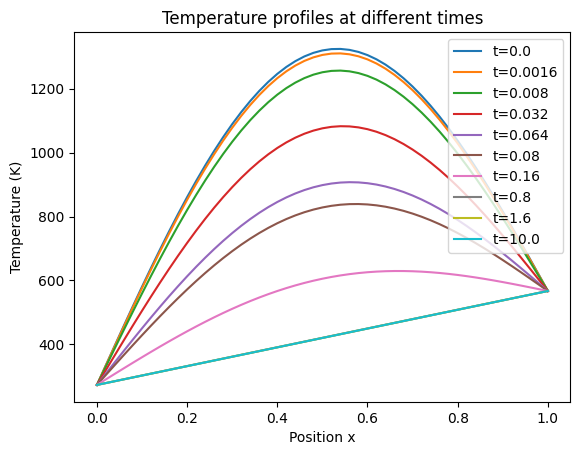

In [23]:
for j in [0, 10, 50 , 200 , 400 , 500, 1000, 5000, 10000 ,-1]:
    plt.plot(x, T[:, j], label=f"t={t[j]}")

plt.legend(loc="upper right")
plt.xlabel("Position x")
plt.ylabel("Temperature (K)")
plt.title("Temperature profiles at different times")
# plt.show()

# plt.show()
plt.savefig("Temp.png")

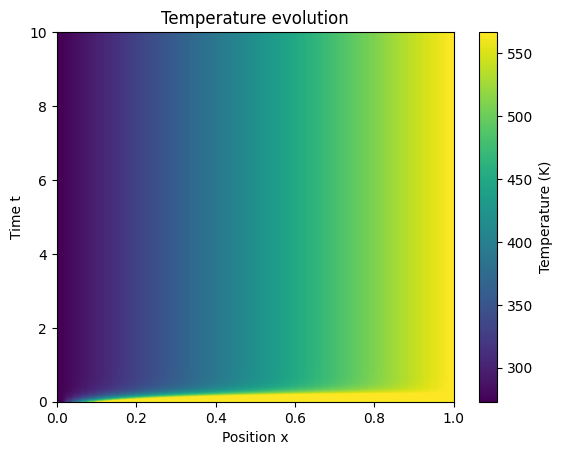

In [24]:
plt.imshow(
    T.T,
    aspect="auto",
    origin="lower",
    extent=[x[0], x[-1], t[0], t[-1]],
    vmin=273, vmax=567  
)
plt.colorbar(label="Temperature (K)")
plt.xlabel("Position x")
plt.ylabel("Time t")
plt.title("Temperature evolution")
plt.savefig("Heatplt.png")